# previsão climática para a América do Sul

https://www.cpc.ncep.noaa.gov/products/international/nmme/nmme.shtml

https://www.cpc.ncep.noaa.gov/products/NMME/


https://ftp.cpc.ncep.noaa.gov/International/nmme/binary_monthly/

# Anomalia padrão da NOAA;NMME

cdo -f nc import_binary FebIC_nmme_precip_anom_stdanom.ctl Feb_nmme_prec_stdanom.nc


no terminal do linux, transformar .ctl em .nc

In [1]:
path_noaa = 'Feb_nmme_prec_stdanom.nc'

In [2]:
import xarray as xr
dnoaa = xr.open_dataset(path_noaa)
dnoaa

/home/casamentos/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/casamentos/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:167: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.Dataset>
Dimensions:  (time: 6, lon: 360, lat: 181)
Coordinates:
  * time     (time) datetime64[ns] 2024-03-15 2024-04-15 ... 2024-08-15
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    precip   (time, lat, lon) float32 ...
    clim     (time, lat, lon) float32 ...
    anom     (time, lat, lon) float32 ...
    stdan    (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Wed Feb 14 19:52:49 2024: cdo -f nc import_binary FebIC_nmm...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [3]:
#ajustar a longitude 

dnoaa.coords['lon'] = ((dnoaa.coords['lon'] + 180) % 360) - 180
dnoaa = dnoaa.sortby(dnoaa.lon)
dnoaa

<xarray.Dataset>
Dimensions:  (time: 6, lat: 181, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2024-03-15 2024-04-15 ... 2024-08-15
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0
Data variables:
    precip   (time, lat, lon) float32 ...
    clim     (time, lat, lon) float32 ...
    anom     (time, lat, lon) float32 ...
    stdan    (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Wed Feb 14 19:52:49 2024: cdo -f nc import_binary FebIC_nmm...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [4]:
dnoaa.time.data

array(['2024-03-15T00:00:00.000000000', '2024-04-15T00:00:00.000000000',
       '2024-05-15T00:00:00.000000000', '2024-06-15T00:00:00.000000000',
       '2024-07-15T00:00:00.000000000', '2024-08-15T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [5]:
#datas dentro do arquivo, ou meses dentro do arquivo
lista_data= list(dnoaa.time.data)
lista_data

[numpy.datetime64('2024-03-15T00:00:00.000000000'),
 numpy.datetime64('2024-04-15T00:00:00.000000000'),
 numpy.datetime64('2024-05-15T00:00:00.000000000'),
 numpy.datetime64('2024-06-15T00:00:00.000000000'),
 numpy.datetime64('2024-07-15T00:00:00.000000000'),
 numpy.datetime64('2024-08-15T00:00:00.000000000')]

In [6]:
lista_data= dnoaa.time.dt.strftime('%d-%m-%Y')
lista_data= list(lista_data.data)
print(lista_data)

['15-03-2024', '15-04-2024', '15-05-2024', '15-06-2024', '15-07-2024', '15-08-2024']


In [7]:
for i, data in enumerate(lista_data):
    print(i,data)

0 15-03-2024
1 15-04-2024
2 15-05-2024
3 15-06-2024
4 15-07-2024
5 15-08-2024


In [8]:
import calendar

import datetime

for data in lista_data:
    # Convertendo a string da data para um objeto datetime
    dt = datetime.datetime.strptime(data, '%d-%m-%Y')
    
    # Obtendo o número de dias no mês usando o módulo calendar
    dias_no_mes = calendar.monthrange(dt.year, dt.month)[1]
    
    # Imprimindo o resultado
    print(f'O mês de {dt.strftime("%B %Y")} tem {dias_no_mes} dias.')

O mês de March 2024 tem 31 dias.
O mês de April 2024 tem 30 dias.
O mês de May 2024 tem 31 dias.
O mês de June 2024 tem 30 dias.
O mês de July 2024 tem 31 dias.
O mês de August 2024 tem 31 dias.


https://www.cpc.ncep.noaa.gov/products/Global_Monsoons/American_Monsoons/SAMS-Phases/
https://www.cpc.ncep.noaa.gov/products/NMME/
    
https://www.cpc.ncep.noaa.gov/products/international/samerica/samerica.shtml 

https://ftp.cpc.ncep.noaa.gov/International/nmme/binary_monthly/

In [9]:
anom= dnoaa['anom']*dias_no_mes

In [10]:
anom

<xarray.DataArray 'anom' (time: 6, lat: 181, lon: 360)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 1.3798382 ,  1.3908099 ,  1.4026002 , ...,  1.3561324 ,
          1.3646967 ,  1.3747482 ],
        [ 1.1830035 ,  1.1247809 ,  1.1007864 , ...,  1.1116194 ,
          1.177424  ,  1.2130747 ],
        ...,
        [ 1.1059873 ,  1.0982859 ,  1.1437756 , ...,  1.0891656 ,
          1.0900486 ,  1.103611  ],
        [ 1.0742829 ,  1.086564  ,  1.098175  , ...,  1.0947512 ,
          1.0877234 ,  1.0790087 ],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 0.65653783,  0.6611644 ,  0.667244  , ...,  0.6440869 ,
          0.6460661 ,  0.6497871 ],
        [ 0.48189497,  0.4425464 ,  0.42429537, ...,  0.44810596,
          0.4822214 ,  0.48405266],
...
        [ 2.446078  ,  2.4965105 ,  2.555454  , ...,  2.3244052 ,
          2.3787327 ,  2.412471  ],
        [ 1.4977542 ,  1.486288  ,  1.4712164 , ...,  1.5302454 ,
          1.5209936 ,  1.5019343 ],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 0.41272926,  0.41690457,  0.41892764, ...,  0.4024086 ,
          0.4058939 ,  0.4100704 ],
        [-0.03699356, -0.05518859, -0.08691675, ..., -0.00589388,
         -0.00906128, -0.01574563],
        ...,
        [ 1.5057783 ,  1.5182993 ,  1.5277169 , ...,  1.4533998 ,
          1.4531853 ,  1.4486787 ],
        [ 2.814697  ,  2.8113208 ,  2.8062198 , ...,  2.8632512 ,
          2.8394394 ,  2.8269818 ],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2024-03-15 2024-04-15 ... 2024-08-15
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0

In [11]:
anom.shape

(6, 181, 360)

In [12]:
mes = anom.isel(time=5)
display(mes)
#selecionar o mapa para ficar dentro da área de interesse, no caso o estado de São Paulo
anom_corte_SP = mes.sel(lat = slice(-30, -15), lon = slice(-55,-38))
anom_corte_SP

<xarray.DataArray 'anom' (lat: 181, lon: 360)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 0.41272926,  0.41690457,  0.41892764, ...,  0.4024086 ,
         0.4058939 ,  0.4100704 ],
       [-0.03699356, -0.05518859, -0.08691675, ..., -0.00589388,
        -0.00906128, -0.01574563],
       ...,
       [ 1.5057783 ,  1.5182993 ,  1.5277169 , ...,  1.4533998 ,
         1.4531853 ,  1.4486787 ],
       [ 2.814697  ,  2.8113208 ,  2.8062198 , ...,  2.8632512 ,
         2.8394394 ,  2.8269818 ],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2024-08-15
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0

<xarray.DataArray 'anom' (lat: 16, lon: 18)>
array([[-26.320518  , -26.96873   , -26.320635  , -20.441946  ,
        -15.68548   , -13.087486  , -12.179495  ,  -7.3398056 ,
         -4.3362093 ,  -3.3038855 ,  -1.6133176 ,  -0.9688228 ,
         -0.43900448,   1.7754571 ,   2.8805006 ,   1.5123214 ,
          1.9283301 ,   2.5760796 ],
       [-26.520908  , -27.691938  , -21.410711  , -18.289204  ,
        -16.209763  ,  -9.201984  , -10.438979  , -11.649541  ,
         -7.001417  ,  -5.368641  ,  -6.8621273 ,  -6.5144725 ,
         -5.1866426 ,  -3.376887  ,  -1.943667  ,  -3.037242  ,
         -1.4190425 ,   1.0693122 ],
       [-26.87149   , -21.653816  , -22.538782  , -23.570255  ,
        -21.751993  , -19.317123  , -14.497768  , -14.537515  ,
        -12.675989  , -11.113603  ,  -8.565708  ,  -7.2747645 ,
         -4.989878  ,  -2.183778  ,  -3.2386692 ,  -4.1307483 ,
         -3.449811  ,  -0.33823243],
       [-25.705921  , -29.508678  , -30.52874   , -28.415201  ,
        -25.45461   , -21.457052  , -17.399502  , -16.196629  ,
        -15.870674  , -14.694124  , -10.807545  ,  -7.697428  ,
         -3.7464805 ,  -2.352241  ,  -2.7349255 ,  -2.2715125 ,
         -0.91313106,   1.3216126 ],
...
       [ -9.0126095 ,  -8.308096  ,  -8.021569  ,  -7.956831  ,
         -7.2063746 ,  -5.462173  ,  -4.9644504 ,  -5.2689414 ,
         -5.045484  ,  -5.021026  ,  -4.6052194 ,  -4.1798487 ,
         -2.9239292 ,   0.6494448 ,   2.677156  ,   3.549735  ,
          3.0424938 ,   1.8426954 ],
       [ -6.0767155 ,  -5.912113  ,  -5.8544884 ,  -5.780898  ,
         -5.317163  ,  -4.797345  ,  -4.751669  ,  -4.3982143 ,
         -3.8932085 ,  -3.4140081 ,  -3.093989  ,  -2.8392048 ,
         -1.6750371 ,  -0.77336365,   2.935756  ,   4.008647  ,
          3.366237  ,   2.3170218 ],
       [ -4.732966  ,  -4.4397984 ,  -3.8659353 ,  -3.5864017 ,
         -3.196941  ,  -3.7221587 ,  -4.199818  ,  -4.2601366 ,
         -3.5549817 ,  -2.9890954 ,  -2.4898436 ,  -2.3475668 ,
         -1.265418  ,   0.70215476,   4.291738  ,   4.8371177 ,
          2.2513034 ,   2.226013  ],
       [ -3.7696528 ,  -3.7567961 ,  -3.1313066 ,  -2.5814815 ,
         -2.2215557 ,  -2.5170772 ,  -2.9172666 ,  -2.9925568 ,
         -2.870056  ,  -2.5941849 ,  -1.8951918 ,  -1.4784664 ,
         -0.9297811 ,   0.62065876,   3.1232347 ,   5.160831  ,
          2.8607492 ,   3.0917203 ]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2024-08-15
  * lat      (lat) float64 -30.0 -29.0 -28.0 -27.0 ... -18.0 -17.0 -16.0 -15.0
  * lon      (lon) float64 -55.0 -54.0 -53.0 -52.0 ... -41.0 -40.0 -39.0 -38.0

In [14]:
tempo2 = mes.time.dt.strftime('%m-%Y')


Text(-41, -28, '08-2024')

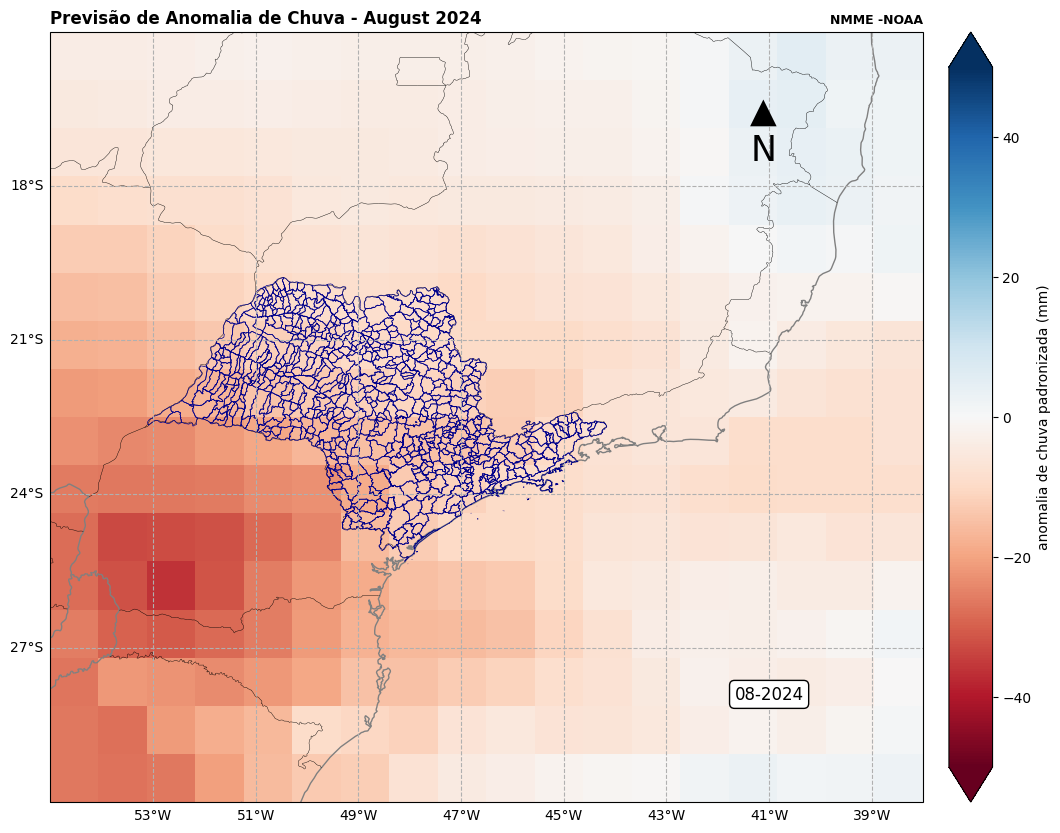

In [15]:
   #Mapa de interesse
    
    
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature
import cartopy.io.shapereader as shpreader  # Import shapefiles

# Assume NEW_anom_corte_SP é o seu dado de anomalia de chuva

# Configura o tamanho do plot
fig = plt.figure(figsize=(15, 10))

# Define a projeção
ax = plt.axes(projection=ccrs.PlateCarree())

# Adiciona linha de costa, terra, borda
ax.coastlines(resolution='10m', color='grey')
ax.add_feature(cartopy.feature.LAND, facecolor='silver')
ax.add_feature(cartopy.feature.BORDERS, edgecolor='gray')

    # Define a área do plot
limites = [-55, -38, -30, -15]
ax.set_extent(limites, crs=ccrs.PlateCarree())

    # Adicionando o dado (assuming NEW_anom_corte_SP is the rainfall anomaly data)
im = ax.imshow(anom_corte_SP, origin='lower', extent=limites, vmin=-50, vmax=50, cmap='RdBu')

    # Adicionando título
plt.title(f'Previsão de Anomalia de Chuva - {dt.strftime("%B %Y")}', fontweight='bold', loc='left')
plt.title('NMME -NOAA', fontweight='bold', fontsize=9, loc='right')

# Adicionando os limites dos estados
shapefile_path = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces_lines')
shapefile = shpreader.Reader(shapefile_path).geometries()
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

shapefile = list(shpreader.Reader('SP_municipios/SP_Municipios_2022.shp').geometries())
    #ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='darkblue',facecolor='none', linewidth=0.5)

    # Configuração das grades
gl = ax.gridlines(linestyle='--', xlocs=np.arange(-55, -38, 2), ylocs=np.arange(-30, -15, 3), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

    # Adicionando a barra de cor
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

axins = inset_axes(ax, width="5%", height="100%", loc='right', borderpad=-5)
cbar = fig.colorbar(im, cax=axins, orientation='vertical', label='anomalia de chuva padronizada (mm)', extend='both')
    
    # North Arrow
ax.annotate(u'\u25B2 \nN ', ha='center', fontsize=25, xy=(-41, -17.5))

# Data box
box = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
ax.annotate(tempo2.data, ha='center', fontsize=12, xy=(-41, -28), bbox=box)


In [16]:
#interpolando
import numpy as np



# Assuming 'lat' and 'lon' are the dimension names, replace them with your actual dimension names
new_lon = np.linspace(anom_corte_SP.lon[0], anom_corte_SP.lon[-1], anom_corte_SP.sizes["lon"] * 5)
new_lat = np.linspace(anom_corte_SP.lat[0], anom_corte_SP.lat[-1], anom_corte_SP.sizes["lat"] * 5)


# Use dimension names instead of string indices
NEW_anom_corte_SP = anom_corte_SP.interp(lat=new_lat, lon=new_lon)

Text(-41, -28, '08-2024')

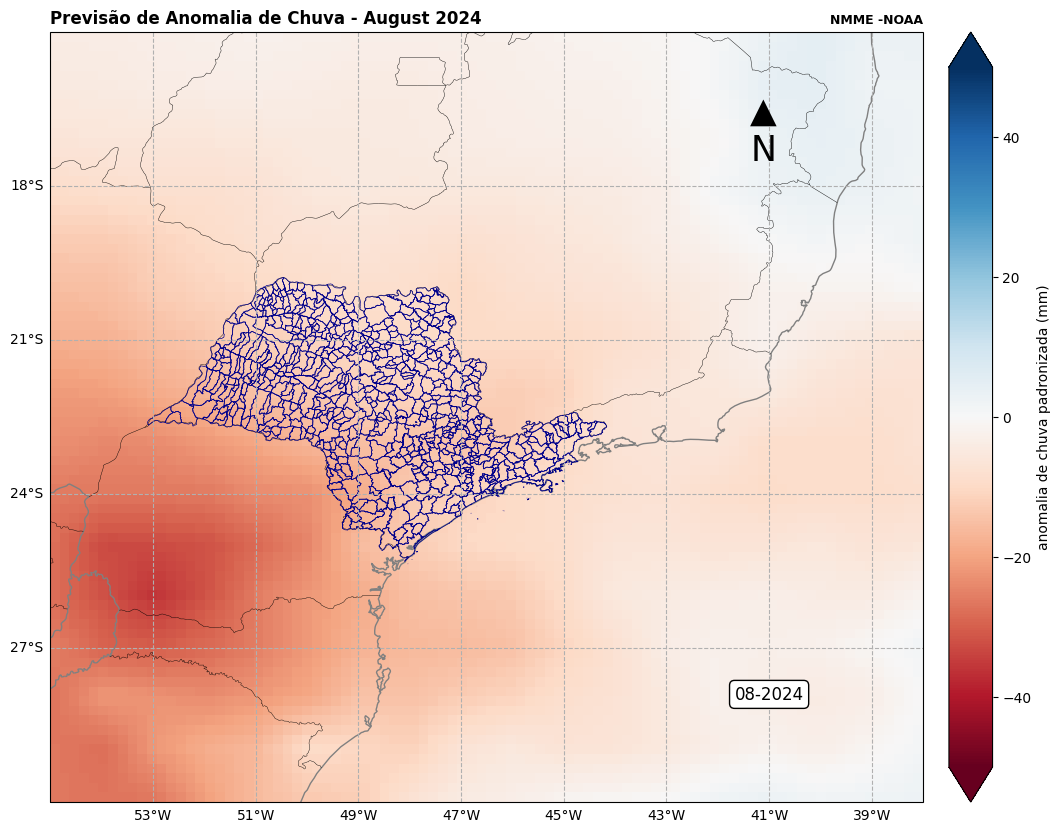

In [17]:
#Mapa de interesse
    
    
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature
import cartopy.io.shapereader as shpreader  # Import shapefiles

# Assume NEW_anom_corte_SP é o seu dado de anomalia de chuva

# Configura o tamanho do plot
fig = plt.figure(figsize=(15, 10))

# Define a projeção
ax = plt.axes(projection=ccrs.PlateCarree())

# Adiciona linha de costa, terra, borda
ax.coastlines(resolution='10m', color='grey')
ax.add_feature(cartopy.feature.LAND, facecolor='silver')
ax.add_feature(cartopy.feature.BORDERS, edgecolor='gray')

    # Define a área do plot
limites = [-55, -38, -30, -15]
ax.set_extent(limites, crs=ccrs.PlateCarree())

    # Adicionando o dado (assuming NEW_anom_corte_SP is the rainfall anomaly data)
im = ax.imshow(NEW_anom_corte_SP, origin='lower', extent=limites, vmin=-50, vmax=50, cmap='RdBu')

    # Adicionando título
plt.title(f'Previsão de Anomalia de Chuva - {dt.strftime("%B %Y")}', fontweight='bold', loc='left')
plt.title('NMME -NOAA', fontweight='bold', fontsize=9, loc='right')

# Adicionando os limites dos estados
shapefile_path = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces_lines')
shapefile = shpreader.Reader(shapefile_path).geometries()
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

shapefile = list(shpreader.Reader('SP_municipios/SP_Municipios_2022.shp').geometries())
    #ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='darkblue',facecolor='none', linewidth=0.5)

    # Configuração das grades
gl = ax.gridlines(linestyle='--', xlocs=np.arange(-55, -38, 2), ylocs=np.arange(-30, -15, 3), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

    # Adicionando a barra de cor
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

axins = inset_axes(ax, width="5%", height="100%", loc='right', borderpad=-5)
cbar = fig.colorbar(im, cax=axins, orientation='vertical', label='anomalia de chuva padronizada (mm)', extend='both')
    
    # North Arrow
ax.annotate(u'\u25B2 \nN ', ha='center', fontsize=25, xy=(-41, -17.5))

# Data box
box = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
ax.annotate(tempo2.data, ha='center', fontsize=12, xy=(-41, -28), bbox=box)


In [18]:
import numpy as np



# Assuming 'lat' and 'lon' are the dimension names, replace them with your actual dimension names
new_lon = np.linspace(anom_corte_SP.lon[0], anom_corte_SP.lon[-1], anom_corte_SP.sizes["lon"] * 3)
new_lat = np.linspace(anom_corte_SP.lat[0], anom_corte_SP.lat[-1], anom_corte_SP.sizes["lat"] * 3)


# Use dimension names instead of string indices
NEW_anom_corte_SP = anom_corte_SP.interp(lat=new_lat, lon=new_lon)

Text(-41, -28, '08-2024')

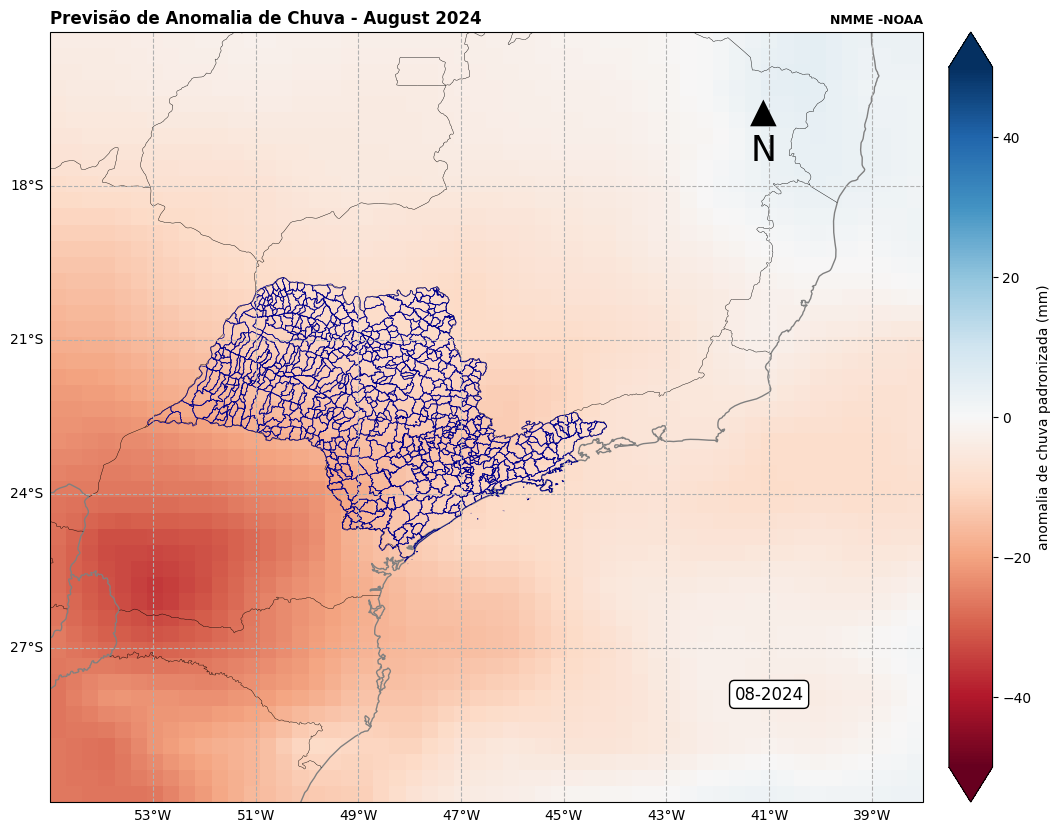

In [19]:
#Mapa de interesse
    
    
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature
import cartopy.io.shapereader as shpreader  # Import shapefiles

# Assume NEW_anom_corte_SP é o seu dado de anomalia de chuva

# Configura o tamanho do plot
fig = plt.figure(figsize=(15, 10))

# Define a projeção
ax = plt.axes(projection=ccrs.PlateCarree())

# Adiciona linha de costa, terra, borda
ax.coastlines(resolution='10m', color='grey')
ax.add_feature(cartopy.feature.LAND, facecolor='silver')
ax.add_feature(cartopy.feature.BORDERS, edgecolor='gray')

    # Define a área do plot
limites = [-55, -38, -30, -15]
ax.set_extent(limites, crs=ccrs.PlateCarree())

    # Adicionando o dado (assuming NEW_anom_corte_SP is the rainfall anomaly data)
im = ax.imshow(NEW_anom_corte_SP, origin='lower', extent=limites, vmin=-50, vmax=50, cmap='RdBu')

    # Adicionando título
plt.title(f'Previsão de Anomalia de Chuva - {dt.strftime("%B %Y")}', fontweight='bold', loc='left')
plt.title('NMME -NOAA', fontweight='bold', fontsize=9, loc='right')

# Adicionando os limites dos estados
shapefile_path = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces_lines')
shapefile = shpreader.Reader(shapefile_path).geometries()
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

shapefile = list(shpreader.Reader('SP_municipios/SP_Municipios_2022.shp').geometries())
    #ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='darkblue',facecolor='none', linewidth=0.5)

    # Configuração das grades
gl = ax.gridlines(linestyle='--', xlocs=np.arange(-55, -38, 2), ylocs=np.arange(-30, -15, 3), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

    # Adicionando a barra de cor
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

axins = inset_axes(ax, width="5%", height="100%", loc='right', borderpad=-5)
cbar = fig.colorbar(im, cax=axins, orientation='vertical', label='anomalia de chuva padronizada (mm)', extend='both')
    
    # North Arrow
ax.annotate(u'\u25B2 \nN ', ha='center', fontsize=25, xy=(-41, -17.5))

# Data box
box = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
ax.annotate(tempo2.data, ha='center', fontsize=12, xy=(-41, -28), bbox=box)


In [20]:
import numpy as np



# Assuming 'lat' and 'lon' are the dimension names, replace them with your actual dimension names
new_lon = np.linspace(anom_corte_SP.lon[0], anom_corte_SP.lon[-1], anom_corte_SP.sizes["lon"] * 10)
new_lat = np.linspace(anom_corte_SP.lat[0], anom_corte_SP.lat[-1], anom_corte_SP.sizes["lat"] * 10)


# Use dimension names instead of string indices
NEW_anom_corte_SP = anom_corte_SP.interp(lat=new_lat, lon=new_lon)

Text(-41, -28, '08-2024')

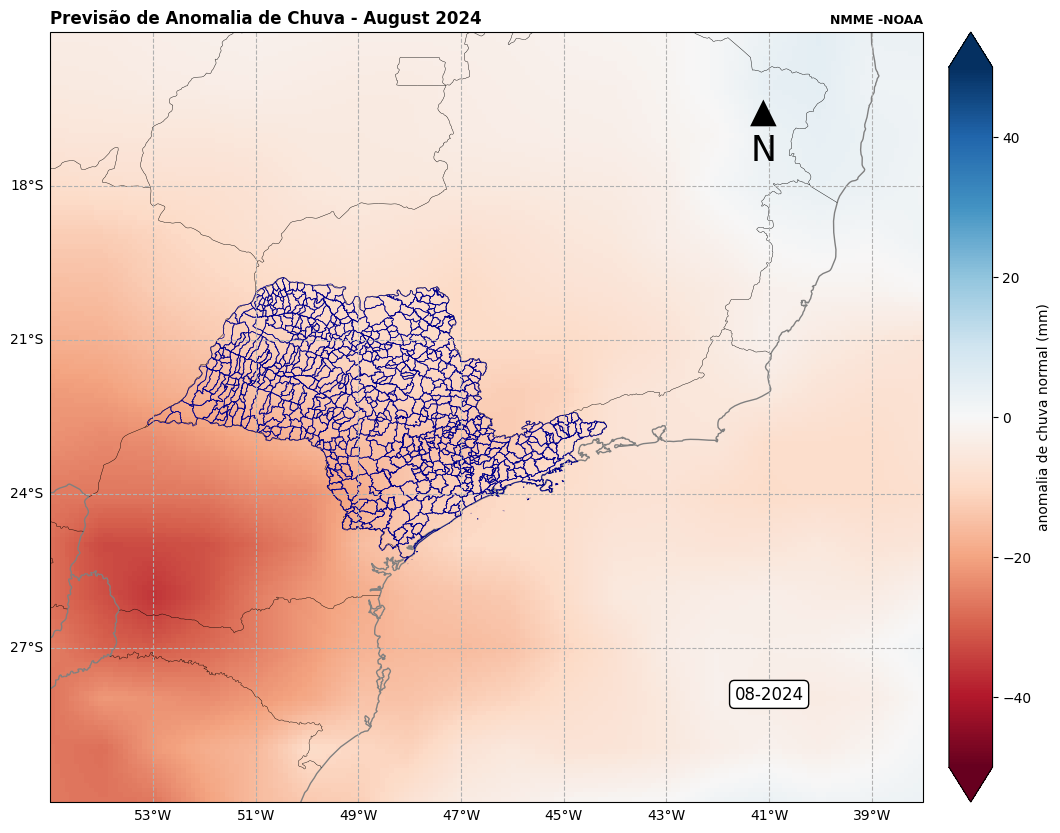

In [21]:
#Mapa de interesse
    
    
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature
import cartopy.io.shapereader as shpreader  # Import shapefiles

# Assume NEW_anom_corte_SP é o seu dado de anomalia de chuva

# Configura o tamanho do plot
fig = plt.figure(figsize=(15, 10))

# Define a projeção
ax = plt.axes(projection=ccrs.PlateCarree())

# Adiciona linha de costa, terra, borda
ax.coastlines(resolution='10m', color='grey')
ax.add_feature(cartopy.feature.LAND, facecolor='silver')
ax.add_feature(cartopy.feature.BORDERS, edgecolor='gray')

    # Define a área do plot
limites = [-55, -38, -30, -15]
ax.set_extent(limites, crs=ccrs.PlateCarree())

    # Adicionando o dado (assuming NEW_anom_corte_SP is the rainfall anomaly data)
im = ax.imshow(NEW_anom_corte_SP, origin='lower', extent=limites, vmin=-50, vmax=50, cmap='RdBu')

    # Adicionando título
plt.title(f'Previsão de Anomalia de Chuva - {dt.strftime("%B %Y")}', fontweight='bold', loc='left')
plt.title('NMME -NOAA', fontweight='bold', fontsize=9, loc='right')

# Adicionando os limites dos estados
shapefile_path = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces_lines')
shapefile = shpreader.Reader(shapefile_path).geometries()
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

shapefile = list(shpreader.Reader('SP_municipios/SP_Municipios_2022.shp').geometries())
    #ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='darkblue',facecolor='none', linewidth=0.5)

    # Configuração das grades
gl = ax.gridlines(linestyle='--', xlocs=np.arange(-55, -38, 2), ylocs=np.arange(-30, -15, 3), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

    # Adicionando a barra de cor
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

axins = inset_axes(ax, width="5%", height="100%", loc='right', borderpad=-5)
cbar = fig.colorbar(im, cax=axins, orientation='vertical', label='anomalia de chuva normal (mm)', extend='both')
    
    # North Arrow
ax.annotate(u'\u25B2 \nN ', ha='center', fontsize=25, xy=(-41, -17.5))

# Data box
box = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
ax.annotate(tempo2.data, ha='center', fontsize=12, xy=(-41, -28), bbox=box)


O mês de March 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 181, lon: 360)>
array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [1.3798382, 1.3908099, 1.4026002, ..., 1.3561324, 1.3646967,
        1.3747482],
       [1.1830035, 1.1247809, 1.1007864, ..., 1.1116194, 1.177424 ,
        1.2130747],
       ...,
       [1.1059873, 1.0982859, 1.1437756, ..., 1.0891656, 1.0900486,
        1.103611 ],
       [1.0742829, 1.086564 , 1.098175 , ..., 1.0947512, 1.0877234,
        1.0790087],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2024-03-15
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0

array('2024-03-15T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
15-03-2024


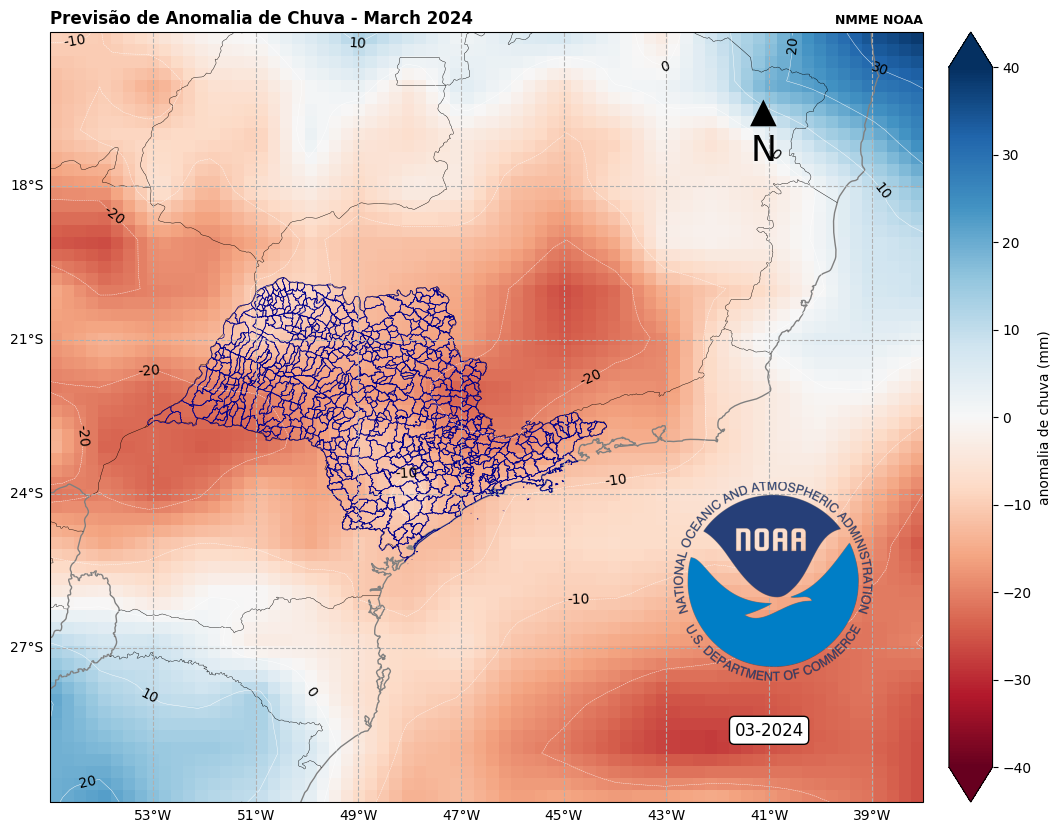

O mês de April 2024 tem 30 dias.


<xarray.DataArray 'anom' (lat: 181, lon: 360)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.6353592 , 0.6398365 , 0.64572   , ..., 0.6233099 , 0.62522525,
        0.62882626],
       [0.46635   , 0.42827073, 0.4106084 , ..., 0.4336509 , 0.46666586,
        0.46843806],
       ...,
       [0.3350481 , 0.3983599 , 0.42879525, ..., 0.2769957 , 0.31107208,
        0.31681943],
       [0.9691396 , 0.98325926, 0.9991801 , ..., 0.922246  , 0.93345314,
        0.9493656 ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2024-04-15
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0

array('2024-04-15T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
15-04-2024


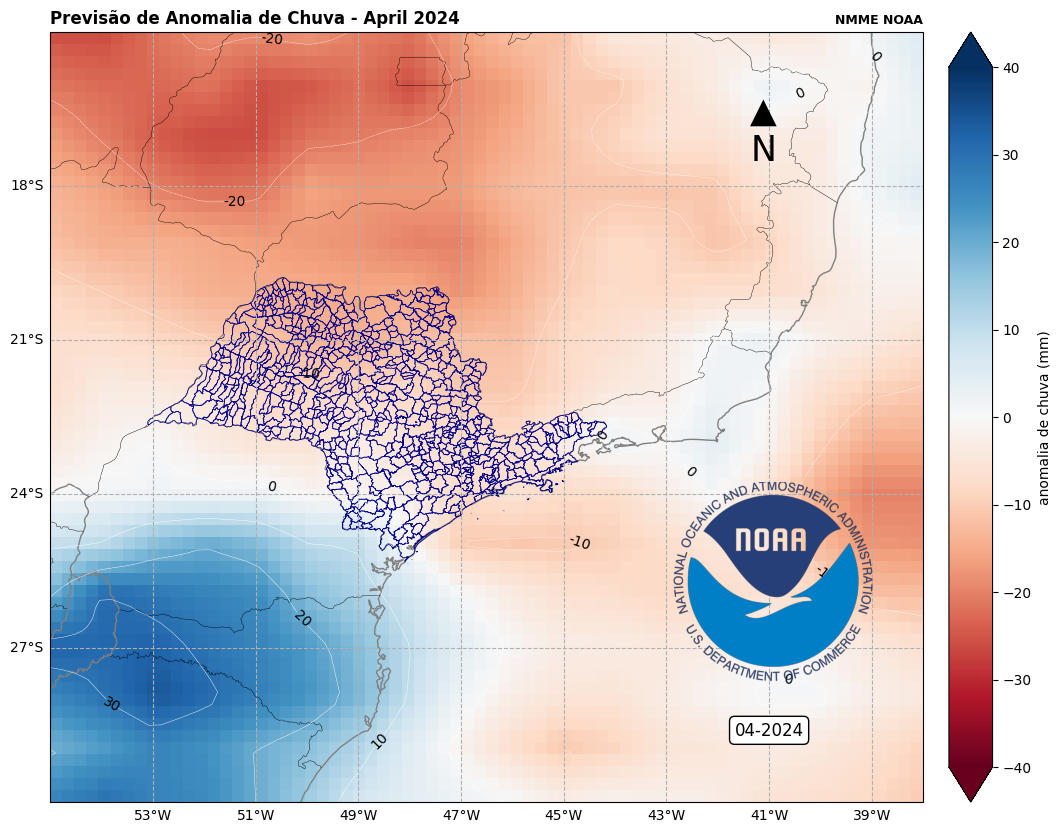

O mês de May 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 181, lon: 360)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.3909369 , 0.390605  , 0.38938394, ..., 0.4008587 , 0.3955397 ,
        0.40179533],
       [0.31189874, 0.34596002, 0.31589258, ..., 0.21981525, 0.2361632 ,
        0.27461225],
       ...,
       [1.8835517 , 1.8535173 , 1.8470411 , ..., 1.8558242 , 1.8965977 ,
        1.9118568 ],
       [1.0635961 , 1.0558411 , 1.0576974 , ..., 1.0138751 , 1.0329208 ,
        1.04718   ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2024-05-15
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0

array('2024-05-15T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
15-05-2024


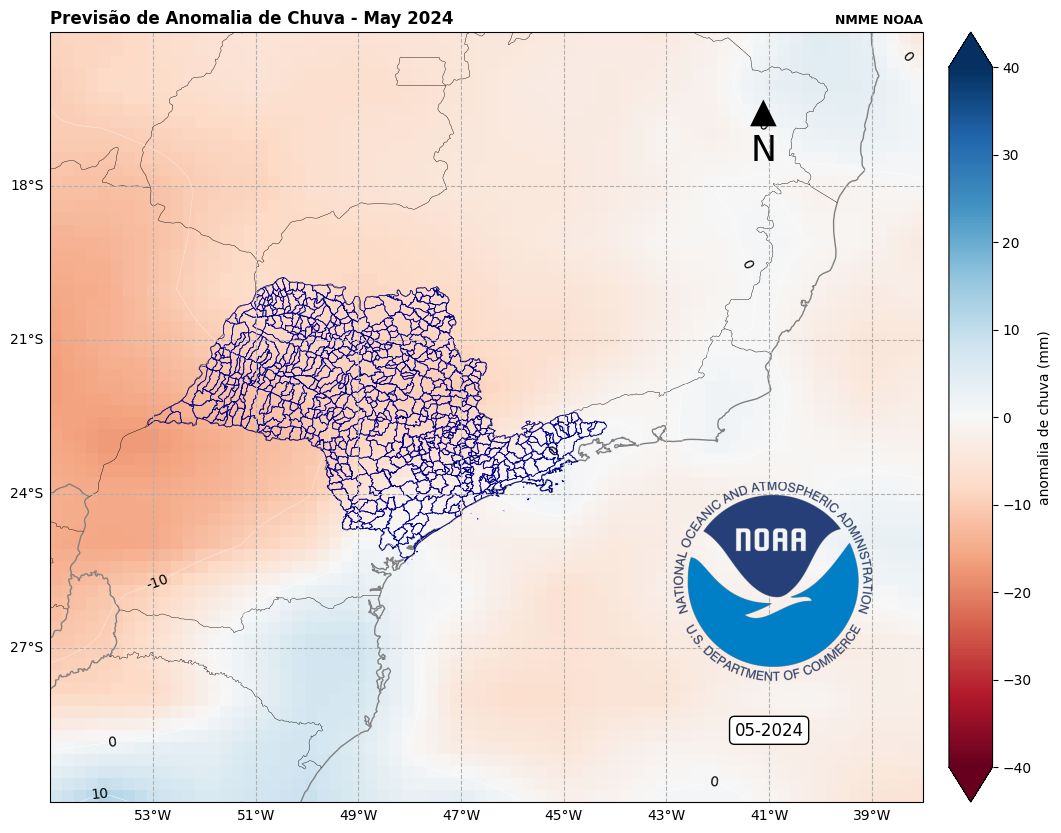

O mês de June 2024 tem 30 dias.


<xarray.DataArray 'anom' (lat: 181, lon: 360)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.7945374 , 0.81032205, 0.82639134, ..., 0.7571872 , 0.7693426 ,
        0.77968043],
       [0.7865075 , 0.8281423 , 0.86893433, ..., 0.7451615 , 0.7611288 ,
        0.7657953 ],
       ...,
       [2.4706557 , 2.4943664 , 2.5210216 , ..., 2.507351  , 2.5074193 ,
        2.484074  ],
       [2.2045772 , 2.2373755 , 2.2788944 , ..., 2.2119794 , 2.2170525 ,
        2.2074554 ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2024-06-15
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0

array('2024-06-15T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
15-06-2024


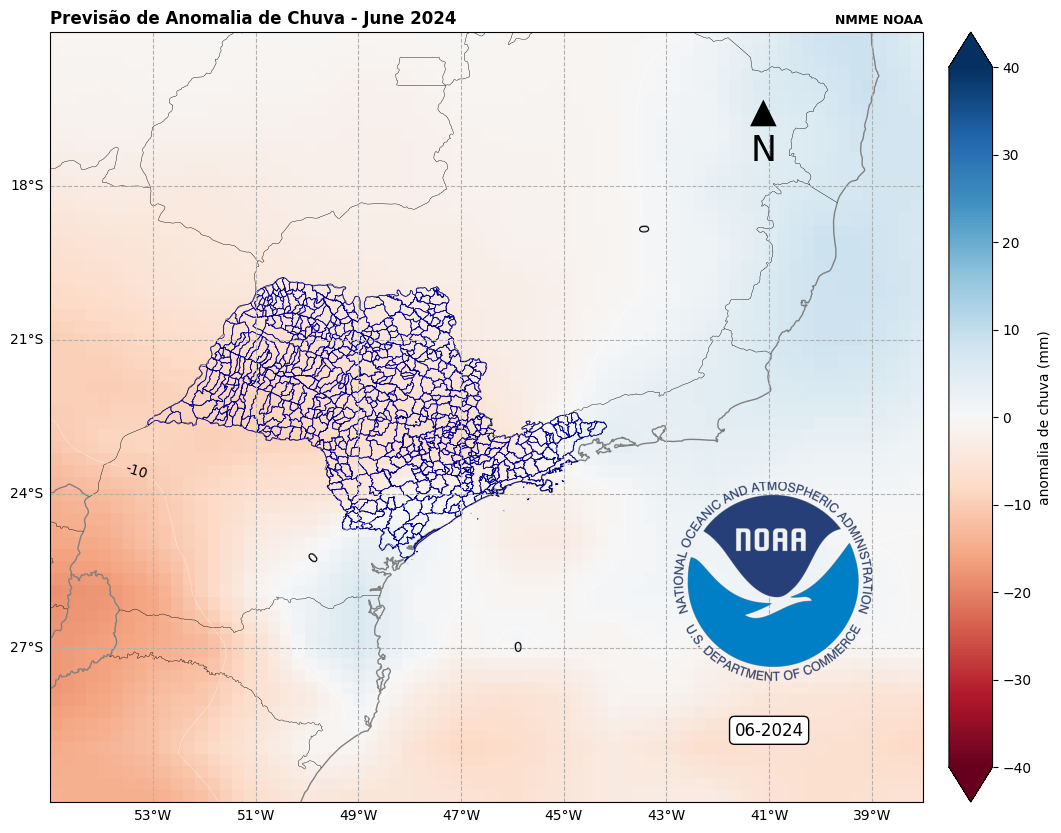

O mês de July 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 181, lon: 360)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.8399046 , 0.8461152 , 0.85680246, ..., 0.8269281 , 0.8319663 ,
        0.8382414 ],
       [0.75139594, 0.77581   , 0.8046339 , ..., 0.72352946, 0.7350303 ,
        0.75052136],
       ...,
       [2.446078  , 2.4965105 , 2.555454  , ..., 2.3244052 , 2.3787327 ,
        2.412471  ],
       [1.4977542 , 1.486288  , 1.4712164 , ..., 1.5302454 , 1.5209936 ,
        1.5019343 ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2024-07-15
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0

array('2024-07-15T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
15-07-2024


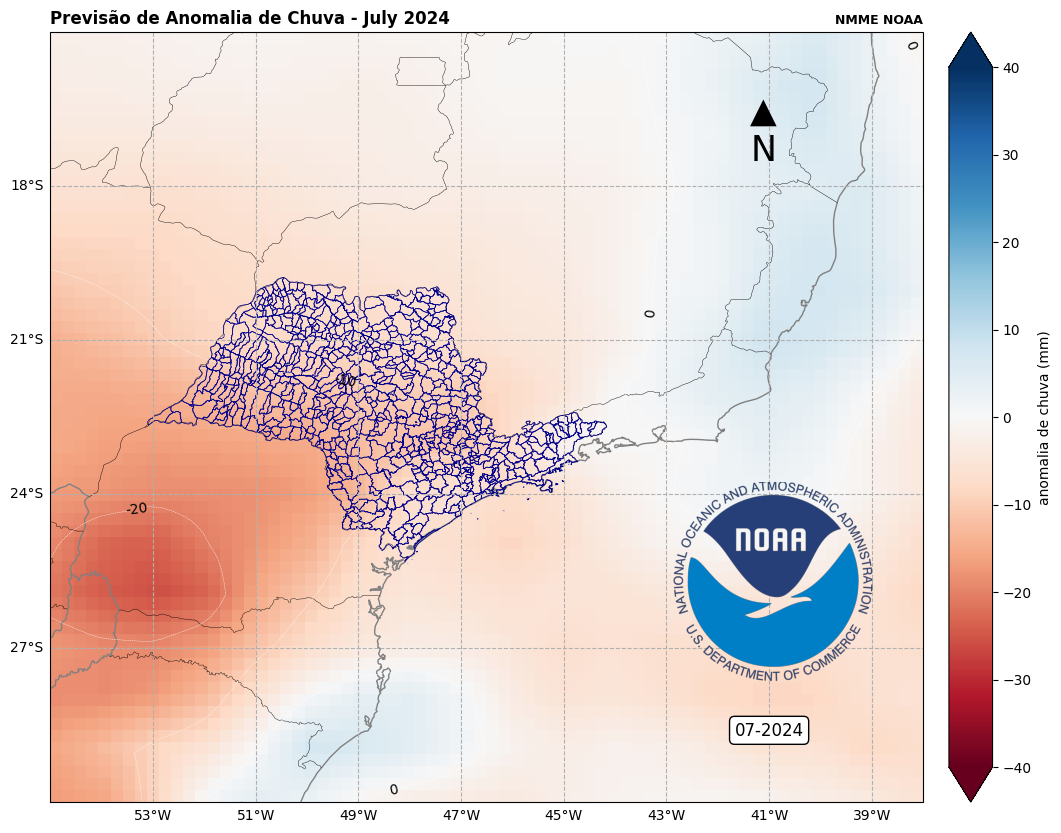

O mês de August 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 181, lon: 360)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 0.41272926,  0.41690457,  0.41892764, ...,  0.4024086 ,
         0.4058939 ,  0.4100704 ],
       [-0.03699356, -0.05518859, -0.08691675, ..., -0.00589388,
        -0.00906128, -0.01574563],
       ...,
       [ 1.5057783 ,  1.5182993 ,  1.5277169 , ...,  1.4533998 ,
         1.4531853 ,  1.4486787 ],
       [ 2.814697  ,  2.8113208 ,  2.8062198 , ...,  2.8632512 ,
         2.8394394 ,  2.8269818 ],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2024-08-15
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0

array('2024-08-15T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
15-08-2024


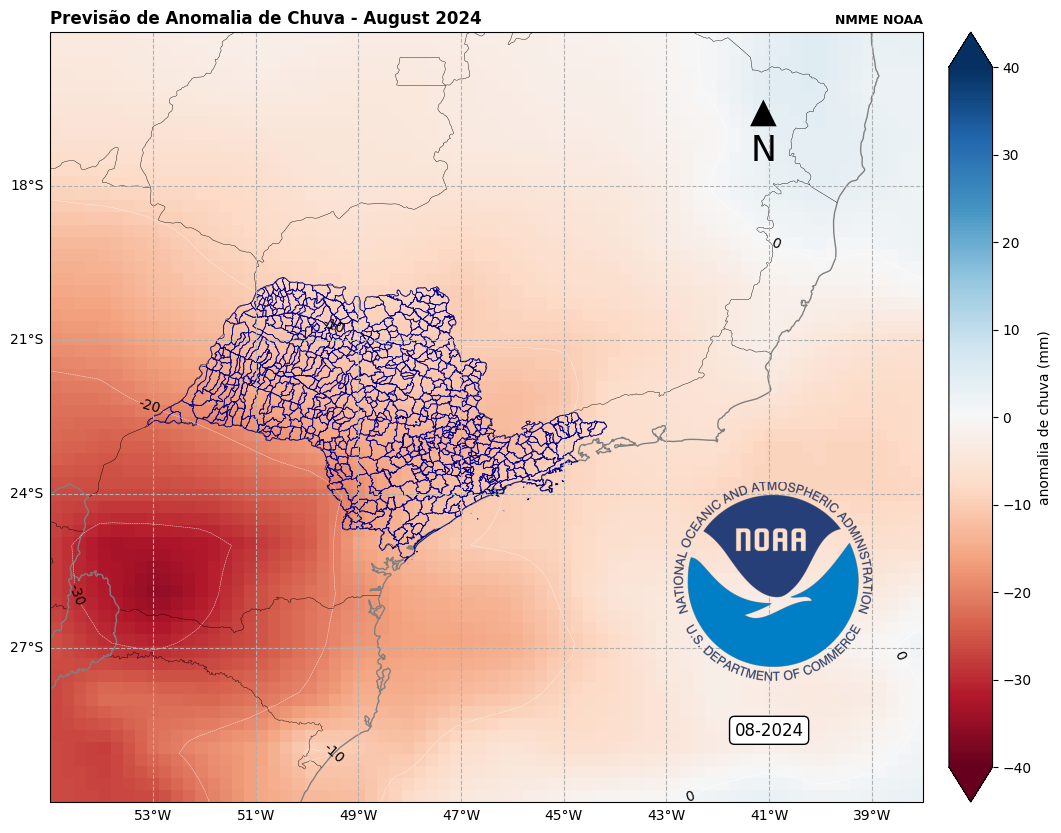

In [22]:
import calendar

import datetime

#for data in lista_data:
for i, data in enumerate(lista_data):
    
    
    # Convertendo a string da data para um objeto datetime
    dt = datetime.datetime.strptime(data, '%d-%m-%Y')
    
    # Obtendo o número de dias no mês usando o módulo calendar
    dias_no_mes = calendar.monthrange(dt.year, dt.month)[1]
    
    # Imprimindo o resultado
    print(f'O mês de {dt.strftime("%B %Y")} tem {dias_no_mes} dias.')
    
    #multiplicar os dias do mês do ano, para saber o volume exato acima da média
    anom= dnoaa['anom']*dias_no_mes

    mes = anom.isel(time=i)
    display(mes)
    
    #preencher a data bonita no texto
    display(mes.time.data)
    tempo = mes.time.dt.strftime('%d-%m-%Y')
    tempo2 = mes.time.dt.strftime('%m-%Y')

    tempo
    print('data do cfsv2')
    print(tempo.data)
    
    #selecionar o mapa para ficar dentro da área de interesse, no caso o estado de São Paulo
    anom_corte_SP = mes.sel(lat = slice(-30, -15), lon = slice(-55,-38))
    anom_corte_SP
    
    import numpy as np



    # Assuming 'lat' and 'lon' are the dimension names, replace them with your actual dimension names
    new_lon = np.linspace(anom_corte_SP.lon[0], anom_corte_SP.lon[-1], anom_corte_SP.sizes["lon"] * 4)
    new_lat = np.linspace(anom_corte_SP.lat[0], anom_corte_SP.lat[-1], anom_corte_SP.sizes["lat"] * 4)


    # Use dimension names instead of string indices
    NEW_anom_corte_SP = anom_corte_SP.interp(lat=new_lat, lon=new_lon)

    #Mapa de interesse
    
    
    import numpy as np
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature
    import cartopy.io.shapereader as shpreader  # Import shapefiles

    # Assume NEW_anom_corte_SP é o seu dado de anomalia de chuva

    # Configura o tamanho do plot
    fig = plt.figure(figsize=(15, 10))

    # Define a projeção
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Adiciona linha de costa, terra, borda
    ax.coastlines(resolution='10m', color='grey')
    ax.add_feature(cartopy.feature.LAND, facecolor='silver')
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='gray')

    # Define a área do plot
    limites = [-55, -38, -30, -15]
    ax.set_extent(limites, crs=ccrs.PlateCarree())

    # Adicionando o dado (assuming NEW_anom_corte_SP is the rainfall anomaly data)
    im = ax.imshow(NEW_anom_corte_SP, origin='lower', extent=limites, vmin=-40, vmax=40, cmap='RdBu')


    #---------- COLOCAR O CONTORNO NO SISTEMA -------------------

    # Define contour levels
    data_min = -40
    data_max = 40
    interval = 10
    levels = np.arange(data_min, data_max, interval)

    
    lons, lats = np.meshgrid(NEW_anom_corte_SP.lon, NEW_anom_corte_SP.lat)
    # Plot contours on top of the image
    contour = ax.contour(lons, lats, NEW_anom_corte_SP, colors='white', linewidths=0.3, levels=levels)
    ax.clabel(contour, inline=1, inline_spacing=0, fontsize=10, fmt='%1.0f', colors='black')
    # Plot contours on top of the image
    #contour = ax.contour(lons, lats, NEW_anom_corte_SP, colors='white', linewidths=0.3, levels=levels, origin='lower')
    #ax.clabel(contour, inline=1, inline_spacing=0, fontsize=10, fmt='%1.0f', colors='black')
    # Plot contours on top of the image
    #contorno havia ficado antes de ponta cabeça (no caso cfsv2 grib2)
   # contour = ax.contour(lons, lats, NEW_anom_corte_SP[::-1, :], colors='white', linewidths=0.3, levels=levels, origin='lower')
   # ax.clabel(contour, inline=1, inline_spacing=0, fontsize=10, fmt='%1.0f', colors='black')
    


    #--------------------------------------------------
    
    
    # Adicionando título
    plt.title(f'Previsão de Anomalia de Chuva - {dt.strftime("%B %Y")}', fontweight='bold', loc='left')
    plt.title('NMME NOAA', fontweight='bold', fontsize=9, loc='right')

    # Adicionando os limites dos estados
    shapefile_path = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces_lines')
    shapefile = shpreader.Reader(shapefile_path).geometries()
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

    shapefile = list(shpreader.Reader('SP_municipios/SP_Municipios_2022.shp').geometries())
    #ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='darkblue',facecolor='none', linewidth=0.5)

    # Configuração das grades
    gl = ax.gridlines(linestyle='--', xlocs=np.arange(-55, -38, 2), ylocs=np.arange(-30, -15, 3), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

    # Adicionando a barra de cor
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes

    axins = inset_axes(ax, width="5%", height="100%", loc='right', borderpad=-5)
    cbar = fig.colorbar(im, cax=axins, orientation='vertical', label='anomalia de chuva (mm)', extend='both')
    
    # North Arrow
    ax.annotate(u'\u25B2 \nN ', ha='center', fontsize=25, xy=(-41, -17.5))

    # ------------plotagem logo da figura-----------------
    im = plt.imread(("1024px-NOAA_logo.svg.png"))
    
    #MEXER NAS POSIÇÕES 1 = Y 2 = Y (menor mais para baixo), 3 X (maior mais para o lado)
    #newax = fig.add_axes([-0.15,0.5,0.5,0.3], anchor='NE', zorder=1)
    #newax = fig.add_axes([0.09,0.5,0.5,0.3], anchor='NE', zorder=1)
    newax = fig.add_axes([0.47,0.23,0.3,0.2], anchor='NE', zorder=1)
    newax.imshow(im)
    
    
    
    # Data box
    box = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    ax.annotate(tempo2.data, ha='center', fontsize=12, xy=(-41, -28.7), bbox=box)
    
    
    newax.axis('off')


    #----------------------------------------------------------

    plt.savefig(f'Figura_nmme_ctl/Normalanomalia_nmmeNOAA{i}.png',bbox_inches='tight', dpi=100)
    # Mostra o plot
    plt.show()
    
    

In [23]:
import numpy as np
import calendar
import datetime
import numpy as np
import matplotlib.pyplot as plt
import cartopy.feature
import cartopy.io.shapereader as shpreader  # Import shapefiles
import calendar
import datetime

O mês de March 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 181, lon: 360)>
array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [1.3798382, 1.3908099, 1.4026002, ..., 1.3561324, 1.3646967,
        1.3747482],
       [1.1830035, 1.1247809, 1.1007864, ..., 1.1116194, 1.177424 ,
        1.2130747],
       ...,
       [1.1059873, 1.0982859, 1.1437756, ..., 1.0891656, 1.0900486,
        1.103611 ],
       [1.0742829, 1.086564 , 1.098175 , ..., 1.0947512, 1.0877234,
        1.0790087],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2024-03-15
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0

array('2024-03-15T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
15-03-2024
O mês de April 2024 tem 30 dias.


<xarray.DataArray 'anom' (lat: 181, lon: 360)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.6353592 , 0.6398365 , 0.64572   , ..., 0.6233099 , 0.62522525,
        0.62882626],
       [0.46635   , 0.42827073, 0.4106084 , ..., 0.4336509 , 0.46666586,
        0.46843806],
       ...,
       [0.3350481 , 0.3983599 , 0.42879525, ..., 0.2769957 , 0.31107208,
        0.31681943],
       [0.9691396 , 0.98325926, 0.9991801 , ..., 0.922246  , 0.93345314,
        0.9493656 ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2024-04-15
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0

array('2024-04-15T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
15-04-2024
O mês de May 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 181, lon: 360)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.3909369 , 0.390605  , 0.38938394, ..., 0.4008587 , 0.3955397 ,
        0.40179533],
       [0.31189874, 0.34596002, 0.31589258, ..., 0.21981525, 0.2361632 ,
        0.27461225],
       ...,
       [1.8835517 , 1.8535173 , 1.8470411 , ..., 1.8558242 , 1.8965977 ,
        1.9118568 ],
       [1.0635961 , 1.0558411 , 1.0576974 , ..., 1.0138751 , 1.0329208 ,
        1.04718   ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2024-05-15
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0

array('2024-05-15T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
15-05-2024
O mês de June 2024 tem 30 dias.


<xarray.DataArray 'anom' (lat: 181, lon: 360)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.7945374 , 0.81032205, 0.82639134, ..., 0.7571872 , 0.7693426 ,
        0.77968043],
       [0.7865075 , 0.8281423 , 0.86893433, ..., 0.7451615 , 0.7611288 ,
        0.7657953 ],
       ...,
       [2.4706557 , 2.4943664 , 2.5210216 , ..., 2.507351  , 2.5074193 ,
        2.484074  ],
       [2.2045772 , 2.2373755 , 2.2788944 , ..., 2.2119794 , 2.2170525 ,
        2.2074554 ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2024-06-15
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0

array('2024-06-15T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
15-06-2024
O mês de July 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 181, lon: 360)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.8399046 , 0.8461152 , 0.85680246, ..., 0.8269281 , 0.8319663 ,
        0.8382414 ],
       [0.75139594, 0.77581   , 0.8046339 , ..., 0.72352946, 0.7350303 ,
        0.75052136],
       ...,
       [2.446078  , 2.4965105 , 2.555454  , ..., 2.3244052 , 2.3787327 ,
        2.412471  ],
       [1.4977542 , 1.486288  , 1.4712164 , ..., 1.5302454 , 1.5209936 ,
        1.5019343 ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2024-07-15
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0

array('2024-07-15T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
15-07-2024
O mês de August 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 181, lon: 360)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 0.41272926,  0.41690457,  0.41892764, ...,  0.4024086 ,
         0.4058939 ,  0.4100704 ],
       [-0.03699356, -0.05518859, -0.08691675, ..., -0.00589388,
        -0.00906128, -0.01574563],
       ...,
       [ 1.5057783 ,  1.5182993 ,  1.5277169 , ...,  1.4533998 ,
         1.4531853 ,  1.4486787 ],
       [ 2.814697  ,  2.8113208 ,  2.8062198 , ...,  2.8632512 ,
         2.8394394 ,  2.8269818 ],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2024-08-15
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0

array('2024-08-15T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
15-08-2024


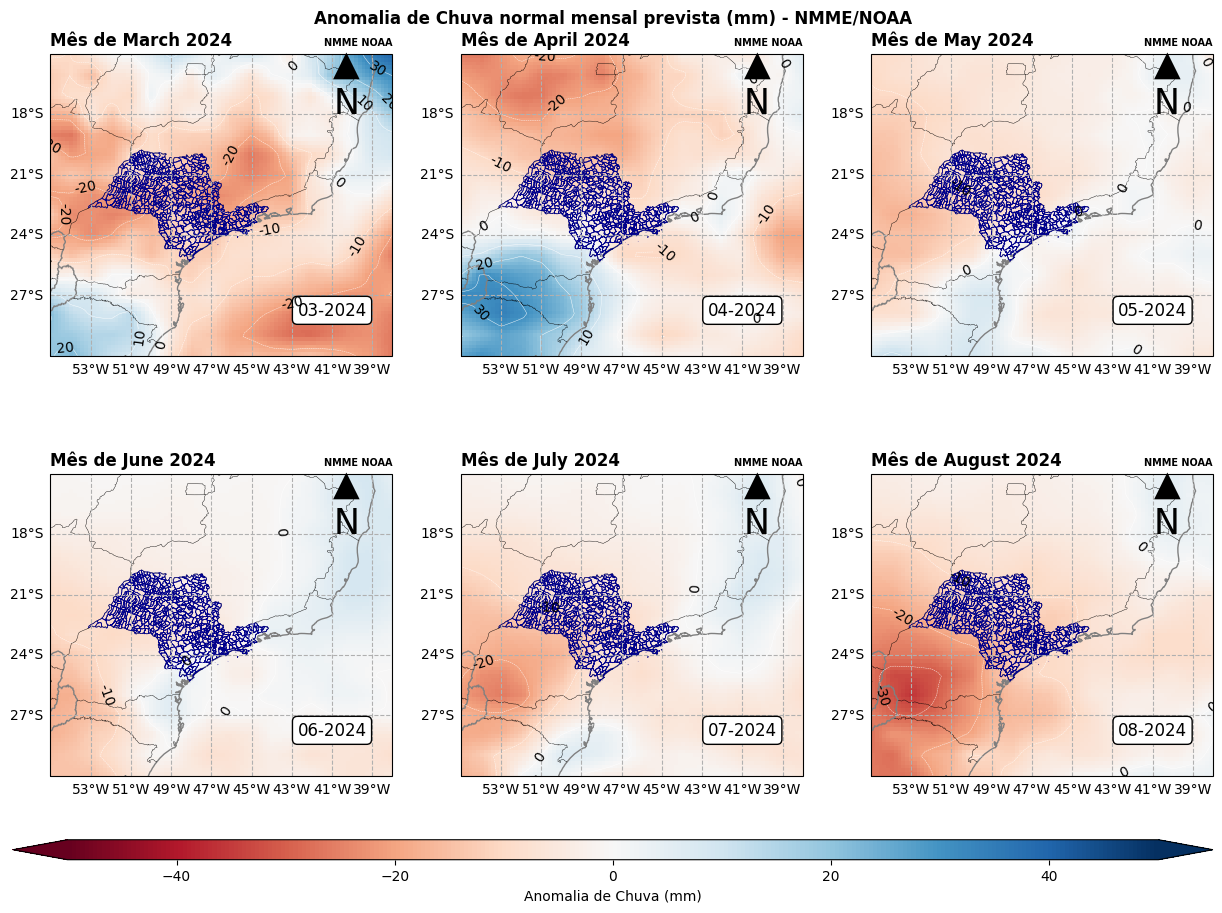

In [24]:

#fig, axs = plt.subplots(nrows=2,ncols=3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(24,17))
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})




# Configura o tamanho do plot
#fig, axs = plt.subplots(nrows=2,ncols=3, len(lista_data), figsize=(15, 5), subplot_kw={'projection': ccrs.PlateCarree()})
i=0
# Itera sobre as datas
for ax, data in zip(axs.flat, lista_data):  # Alteração aqui: uso do zip para iterar sobre axs e lista_data
    # Convertendo a string da data para um objeto datetime
    dt = datetime.datetime.strptime(data, '%d-%m-%Y')
    
    # Obtendo o número de dias no mês usando o módulo calendar
    dias_no_mes = calendar.monthrange(dt.year, dt.month)[1]
    
    
    # Imprimindo o resultado
    print(f'O mês de {dt.strftime("%B %Y")} tem {dias_no_mes} dias.')
    
    #multiplicar os dias do mês do ano, para saber o volume exato acima da média
    anom= dnoaa['anom']*dias_no_mes

    mes = anom.isel(time=i)
    display(mes)
    
    #preencher a data bonita no texto
    display(mes.time.data)
    tempo = mes.time.dt.strftime('%d-%m-%Y')
    tempo2 = mes.time.dt.strftime('%m-%Y')

    tempo
    print('data do cfsv2')
    print(tempo.data)
    
    #selecionar o mapa para ficar dentro da área de interesse, no caso o estado de São Paulo
    anom_corte_SP = mes.sel(lat = slice(-30, -15), lon = slice(-55,-38))
    anom_corte_SP
    
    # Assuming 'lat' and 'lon' are the dimension names, replace them with your actual dimension names
    #Interpolation of data /interpolação dos dados
    new_lon = np.linspace(anom_corte_SP.lon[0], anom_corte_SP.lon[-1], anom_corte_SP.sizes["lon"] * 5)
    new_lat = np.linspace(anom_corte_SP.lat[0], anom_corte_SP.lat[-1], anom_corte_SP.sizes["lat"] * 5)


    # Use dimension names instead of string indices
    NEW_anom_corte_SP = anom_corte_SP.interp(lat=new_lat, lon=new_lon)
    
  # Adiciona linha de costa, terra, borda
    ax.coastlines(resolution='10m', color='grey')  # Corrigido aqui: use 'ax' diretamente
    ax.add_feature(cartopy.feature.LAND, facecolor='silver')
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='gray')

    # Define a área do plot
    limites = [-55, -38, -30, -15]
    ax.set_extent(limites, crs=ccrs.PlateCarree())

    # Adicionando o dado (assuming NEW_anom_corte_SP is the rainfall anomaly data)
    im = ax.imshow(NEW_anom_corte_SP, origin='lower', extent=limites, vmin=-50, vmax=50, cmap='RdBu')

    #---------- COLOCAR O CONTORNO NO SISTEMA -------------------

    # Define contour levels
    data_min = -40
    data_max = 40
    interval = 10
    levels = np.arange(data_min, data_max, interval)

    
    lons, lats = np.meshgrid(NEW_anom_corte_SP.lon, NEW_anom_corte_SP.lat)
    # Plot contours on top of the image
    contour = ax.contour(lons, lats, NEW_anom_corte_SP, colors='white', linewidths=0.3, levels=levels)
    ax.clabel(contour, inline=1, inline_spacing=0, fontsize=10, fmt='%1.0f', colors='black')
    # Plot contours on top of the image
    #contour = ax.contour(lons, lats, NEW_anom_corte_SP, colors='white', linewidths=0.3, levels=levels, origin='lower')
    #ax.clabel(contour, inline=1, inline_spacing=0, fontsize=10, fmt='%1.0f', colors='black')
    # Plot contours on top of the image
    #contorno havia ficado antes de ponta cabeça (no caso cfsv2 grib2)
   # contour = ax.contour(lons, lats, NEW_anom_corte_SP[::-1, :], colors='white', linewidths=0.3, levels=levels, origin='lower')
   # ax.clabel(contour, inline=1, inline_spacing=0, fontsize=10, fmt='%1.0f', colors='black')
    


    #--------------------------------------------------
    
    
    # Adicionando título
   # ax.set_title(f'Previsão de Anomalia de Chuva - {dt.strftime("%B %Y")}', fontweight='bold', loc='left')
    #ax.set_title('E2 CFSV2', fontweight='bold', fontsize=9, loc='right')
    # Adiciona título
    ax.set_title(f'Mês de {dt.strftime("%B %Y")}',fontweight='bold', loc='left')
    # Adicionando título
    #ax.set_title(f'Previsão de Anomalia de Chuva', fontweight='bold', loc='left')
    ax.set_title('NMME NOAA', fontweight='bold', fontsize=7, loc='right')
    
    
    # Adicionando os limites dos estados
    shapefile_path = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces_lines')
    shapefile = shpreader.Reader(shapefile_path).geometries()
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

    shapefile = list(shpreader.Reader('SP_municipios/SP_Municipios_2022.shp').geometries())
    #ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='darkblue',facecolor='none', linewidth=0.5)

    # Configuração das grades
    gl = ax.gridlines(linestyle='--', xlocs=np.arange(-55, -38, 2), ylocs=np.arange(-30, -15, 3), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    # North Arrow
    ax.annotate(u'\u25B2 \nN ', ha='center', fontsize=25, xy=(-40, -18.0))
    
    # Data box
    box = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    ax.annotate(tempo2.data, ha='center', fontsize=12, xy=(-41, -28), bbox=box)
        
    i=i+1
    
fig.suptitle('Anomalia de Chuva normal mensal prevista (mm) - NMME/NOAA',fontweight='bold', y=0.90)    
# Adiciona a barra de cor (assumindo que você já tem a variável im definida)
cax = fig.add_axes([0.1, 0.05, 0.8, 0.02])

#cax = fig.add_axes([0.1, -0.1, 0.8, 0.02])

#[left, bottom, width, height]
cbar = fig.colorbar(im, cax=cax, orientation='horizontal', label='Anomalia de Chuva (mm)', extend='both')    
    

# Adiciona a barra de cor (assumindo que você já tem a variável im definida)
#cax = fig.add_axes([0.1, 0.1, 0.8, 0.02])

#cax = fig.add_axes([0.1, -0.1, 0.8, 0.02])

#[left, bottom, width, height]
#cbar = fig.colorbar(im, cax=cax, orientation='horizontal', label='Anomalia de Chuva (mm)', extend='both')
plt.savefig('Figura_nmme_ctl/figs_anomalia_NMMENoaa.png',bbox_inches='tight', dpi=100)